# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tdeganck\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tdeganck\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
data_path = "../../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [92]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [93]:
# Exemple de fichiers
files[:5]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt']

In [94]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [95]:
# Exemple de textes
texts[0][:400]

"ia« le som ÏJsIne MéuhMrïiqii S.AT'BBirîï^^ J00, r. Merlu» Duché, Vllvorde ch. STENO-DACTYLO élément de let ordre, bilingue, bon- i ne rémunération. Situation d’avenir, i Candidat, A soumet par écrit 130221H PORTANTE 80C.BRUXELL0I8I cherche pour entrée Immédiate Secrétaire Sténo-Dactylo 3 françalee - 1 an d'expérience, al tuât h «table - semaine de 5 Jours. Ecrire é cur. vit et prêt Ag. Rossel 029"

## Vectoriser les documents à l'aide de TF-IDF

In [96]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [97]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [98]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\tdeganck\Doc en local\Corpus\tac\.corpus_env\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [99]:
# Détail de la matrice
tfidf_vectors

<1000x2998 sparse matrix of type '<class 'numpy.float64'>'
	with 591558 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [100]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.429849
ecrire        0.290763
agence        0.287302
bilingue      0.195620
importante    0.172368
                ...   
envoyé        0.000000
er            0.000000
erreurs       0.000000
esp           0.000000
♦             0.000000
Length: 2998, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [5]:
cosine([1, 2, 3], [1, 2, 3])

0

In [102]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [103]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [104]:
tfidf_array = tfidf_vectors.toarray()

In [105]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [106]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.01044745, ..., 0.01088908, 0.01243897,
       0.        ])

In [107]:
cosine(tfidf_array[0], tfidf_array[1])

0.9628761011759681

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [6]:
N_CLUSTERS = 2

### Instancier le modèle K-Means et ses arguments

In [141]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [142]:
clusters = km_model.fit_predict(tfidf_vectors)

In [143]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [144]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-10_01-00018.txt',
     'KB_JB838_1960-01-21_01-00014.txt',
     'KB_JB838_1960-01-22_01-00015.txt',
     'KB_JB838_1960-02-03_01-00019.txt',
     'KB_JB838_1960-02-13_01-00020.txt',
     'KB_JB838_1960-02-24_01-00020.txt',
     'KB_JB838_1960-03-11_01-00020.txt',
     'KB_JB838_1960-03-11_01-00022.txt',
     'KB_JB838_1960-03-25_01-00020.txt',
     'KB_JB838_1960-03-29_01-00018.txt',
     'KB_JB838_1960-04-01_01-00020.txt',
     'KB_JB838_1960-04-01_01-00022.txt',
     'KB_JB838_1960-04-02_01-00017.txt',
     'KB_JB838_1960-04-05_01-00016.txt',
     'KB_JB838_1960-04-13_01-00017.txt',
     'KB_JB838_1960-04-14_01-00016.txt',
     'KB_JB838_1960-04-20_01-00016.txt',
     'KB_JB838_1960-04-30_01-00016.txt',
     'KB_JB838_1960-05-28_01-00021.txt',
     'KB_JB838_1960-07-06_01-00020.txt',
     'KB_JB838_1960-07-14_01-00015.txt',
     'KB_JB838_1960-08-04_01-00018.txt',
     'KB_JB838_1960-08-13_01-00016.txt',
     'KB_JB838_1960-08-25_01-00021.txt',
     'KB_JB838_1

Placer tous les textes des deux clusters dans deux fichiers

In [148]:
# Définir la fonction pour lire et enregistrer les fichiers textes
def read_file(file_path):
    """Lire le contenu d'un fichier texte donné"""
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# Définir le répertoire de destination des deux fichiers
#output_dir = "../tps/tp3/"  [je met ceci en commentaire car j'avais au 
# départ adapté le code dans le dossier du module 4, si on ne spécifie pas, alors l'outpudir sera 
# le dossier de travail en cours]

# Créer les fichiers pour chaque cluster et y enregistrer les textes
for label, files_in_cluster in clustering.items():
    output_file = os.path.join(output_dir, f"cluster_{label}_texts.txt")  # Nom du fichier pour chaque cluster
    with open(output_file, 'w', encoding='utf-8') as f_out:
        for file_path in files_in_cluster:
            file_content = read_file(data_path + file_path)  # Lire le contenu du fichier
            f_out.write(file_content + "\n\n")  # Ajouter un saut de ligne entre chaque texte
    print(f"Cluster {label} - Texte sauvegardé dans {output_file}")

Cluster 0 - Texte sauvegardé dans ../tps/tp3/cluster_0_texts.txt
Cluster 1 - Texte sauvegardé dans ../tps/tp3/cluster_1_texts.txt


## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [145]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [146]:
reduced_vectors[:10]

array([[ 0.4992516 , -0.43941755],
       [-0.22887339,  0.0013748 ],
       [-0.27929013, -0.0157115 ],
       [ 0.28623276,  0.51679183],
       [ 0.3069986 ,  0.51868355],
       [-0.28969465, -0.09047545],
       [-0.04744472,  0.04053178],
       [-0.06063925,  0.11980072],
       [-0.22347724, -0.05224705],
       [-0.12166066,  0.07459249]])

### Générer le plot

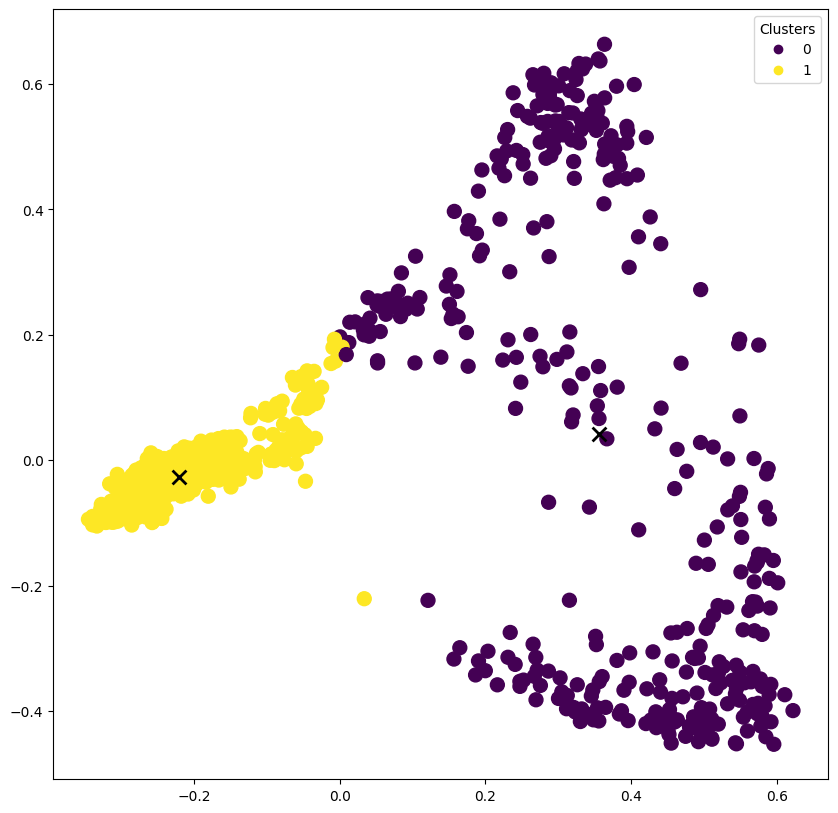

In [147]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")